Portrait plot

In [1]:
import numpy as np
import xarray as xr
import glob
import os
from pcmdi_metrics.graphics import portrait_plot
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch

/global/homes/j/jungchoi/.conda/envs/pcmdi_metrics/lib/python3.10/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(
ERROR 1: PROJ: proj_create_from_database: Open of /global/homes/j/jungchoi/.conda/envs/pcmdi_metrics/share/proj failed


In [6]:
mdl_list = ['MME', 'CanESM5', 'CMCC-CM2-SR5', 'CNRM-ESM2-1', 'EC-Earth3', 'FGOALS-f3-L', 'HadGEM3-GC31-MM', 'IPSL-CM6A-LR', 'MIROC6', 'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'NorCPM1']

filename1 = "Fig9.Skill_ACC.TAS.nc"
filename2 = "Fig9.Skill_MSSS.TAS.nc"
filename3 = "Fig9.Skill_RPC.TAS.nc"

ds1 = xr.open_dataset(filename1)
ds2 = xr.open_dataset(filename2)
ds3 = xr.open_dataset(filename3)

var1_data = ds1["acc"].values
var2_data = ds2["msss"].values
var3_data = ds3["rpc"].values

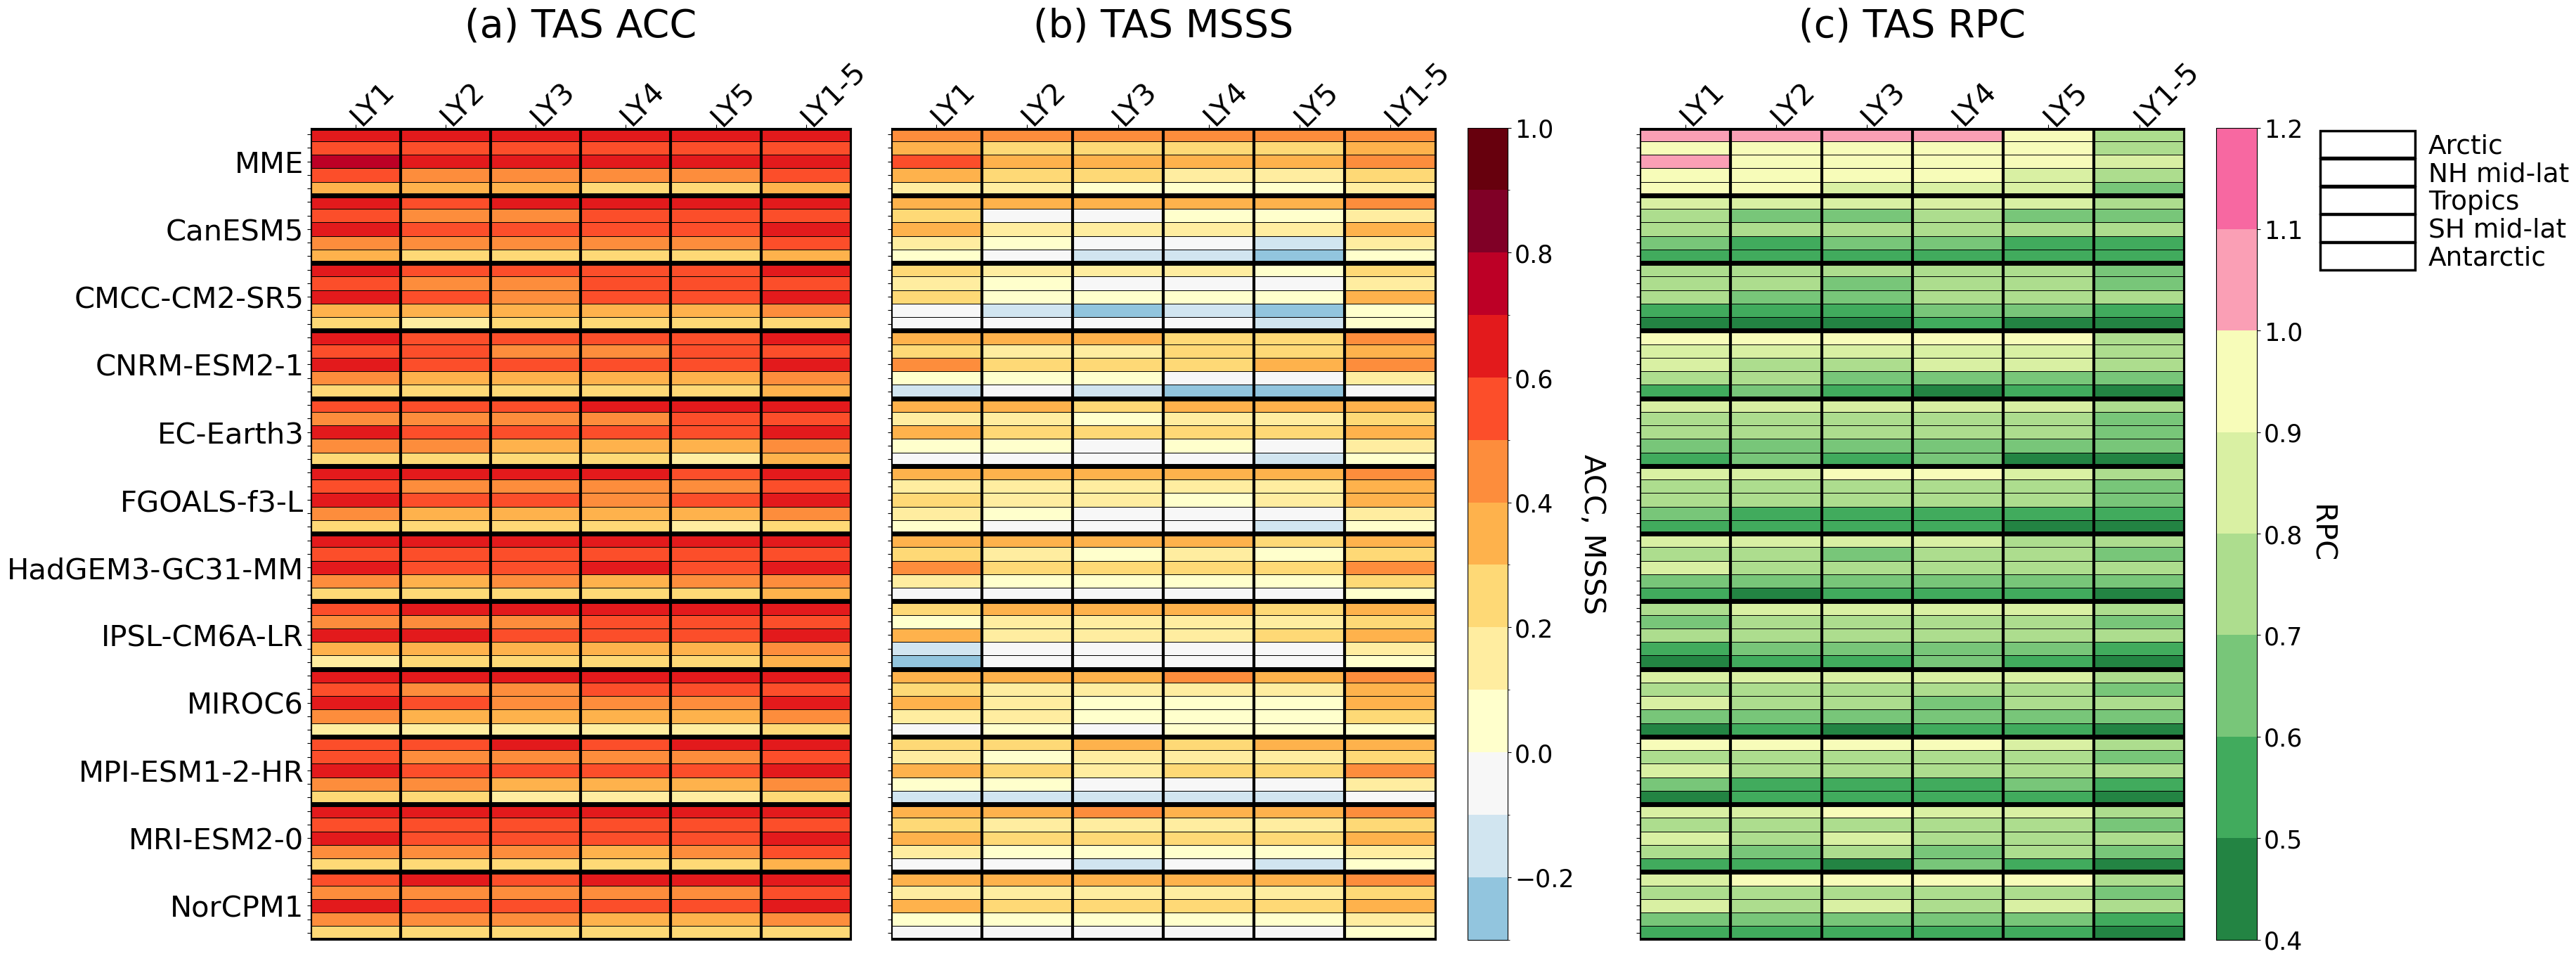

In [7]:
# Draw Portrait Plot for Mean bias (a) TAS, (b) PR

padded_mdl_list = []

for model in mdl_list:
    padded_mdl_list.extend(['', '', model, '', '']) 
    
xaxis_labels = ['LY1', 'LY2', 'LY3', 'LY4', 'LY5', 'LY1-5']
yaxis_labels = padded_mdl_list

xaxis_labels = [''+x for x in xaxis_labels]
yaxis_labels = [''+y for y in yaxis_labels]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(40,15))

colors1 = [
     '#92c5de', '#d1e5f0',  '#f7f7f7', 
    '#ffffcc', '#ffeda0', '#fed976', '#feb24c', '#fd8d3c', '#fc4e2a', '#e31a1c', '#bd0026', '#800026', 
    '#a50f15', '#67000d'
]

cmap_bounds1 = [-3., -.2, -.1, 0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.]
custom_cmap1 = ListedColormap(colors1)


portrait_plot([var1_data],
              fig=fig, ax=ax[0],
              xaxis_labels=xaxis_labels, xaxis_fontsize=30,
              yaxis_labels=yaxis_labels, yaxis_fontsize=30,
              #legend_on=True,
              inner_line_color="k", 
              cmap=custom_cmap1,
              cmap_bounds=cmap_bounds1,
              colorbar_off=True,
              missing_color='lightgrey',
              box_as_square=False, logo_off=True)
ax[0].set_title(f"(a) TAS ACC", fontsize=40, pad=20)

fig, ax[1], cbar = portrait_plot([var2_data],
              fig=fig, ax=ax[1],
              xaxis_labels=xaxis_labels, xaxis_fontsize=30, 
              yaxis_labels=[],
              inner_line_color="k",
              cmap=custom_cmap1,
              cmap_bounds=cmap_bounds1,
              cbar_label='ACC, MSSS', cbar_label_fontsize=30, cbar_tick_fontsize=25,
              missing_color='lightgrey',
              box_as_square=False, logo_off=True)
ax[1].set_title(f"(b) TAS MSSS", fontsize=40, pad=20)

colors2 = [
   # '#cccccc', '#081d58', '#253494', '#3f007d', '#54278f', '#6a51a3', 
   # '#807dba', '#9e9ac8', '#bcbddc', '#dadaeb', '#efedf5',  '#e08214', '#b35806']
 #'#238443', '#41ab5d', '#78c679', '#addd8e', '#d9f0a3', '#f7fcb9',  '#fde0dd', '#fa9fb5', '#f768a1']
 '#238443', '#41ab5d', '#78c679', '#addd8e', '#d9f0a3', '#f7fcb9',  '#fa9fb5', '#f768a1']

#cmap_bounds2 = [-.1, 0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 1.1, 1.2]
cmap_bounds2 = [ .4, .5, .6, .7, .8, .9, 1, 1.1, 1.2]
custom_cmap2 = ListedColormap(colors2)

fig, ax[2], cbar2 = portrait_plot([var3_data],
              fig=fig, ax=ax[2],
              xaxis_labels=xaxis_labels, xaxis_fontsize=30, 
              yaxis_labels=[],
              inner_line_color="k",
              #inner_line_width=0,
              #cmap="OrRd",
              cmap=custom_cmap2, 
              cmap_bounds=cmap_bounds2,
              cbar_label='RPC', cbar_label_fontsize=30, cbar_tick_fontsize=25, 
              missing_color='lightgrey', 
              #legend_labels=['NH', 'TRO', 'SH', 'GLO'], legend_on=True, legend_box_size=2, legend_fontsize=25, legend_box_xy=(1.35, 1),
              box_as_square=False, logo_off=True)
ax[2].set_title(f"(c) TAS RPC", fontsize=40, pad=20)

plt.subplots_adjust(wspace=0.1, hspace=0)
pos0 = ax[0].get_position()
pos1 = ax[1].get_position()
pos2 = ax[2].get_position()
ax[0].set_position([pos0.x0, pos0.y0, pos0.width-0.05, pos0.height])
ax[1].set_position([pos1.x0 - 0.06, pos1.y0, pos1.width, pos1.height])
ax[2].set_position([pos2.x0 - 0.06, pos2.y0, pos2.width, pos2.height])

cbar.ax.set_position([pos1.x0 + 0.145, pos1.y0, 0.5, pos1.height])
cbar2.ax.set_position([pos2.x0 + 0.145, pos2.y0, 0.5, pos2.height])

for yy in range(0, 65, 5):
    ax[0].hlines(y=yy, xmin=0, xmax=6, colors='k', linestyles='-', linewidth=5, zorder=15)
    ax[1].hlines(y=yy, xmin=0, xmax=6, colors='k', linestyles='-', linewidth=5, zorder=15)
    ax[2].hlines(y=yy, xmin=0, xmax=6, colors='k', linestyles='-', linewidth=5, zorder=15)
for xx in range(0, 7):
    ax[0].vlines(x=xx, ymin=0, ymax=60, colors='black', linestyles='-', linewidth=3, zorder=15)
    ax[1].vlines(x=xx, ymin=0, ymax=60, colors='black', linestyles='-', linewidth=3, zorder=15)
    ax[2].vlines(x=xx, ymin=0, ymax=60, colors='black', linestyles='-', linewidth=3, zorder=15)

# Add legend
color = 'white'
labels = ['Arctic', 'NH mid-lat', 'Tropics', 'SH mid-lat', 'Antarctic']

handles = [Patch(facecolor=color, edgecolor='black', linewidth=2.5, label=label) for label in labels]

legend = ax[1].legend(
    handles=handles,
    loc='center left',
    bbox_to_anchor=(2.6, 0.91), 
    frameon=False,
    handlelength=3.6,
    handleheight=1.2,
    borderpad=0.0,
    labelspacing=0,
    fontsize=27,
    handletextpad=0.5
)

for text in legend.get_texts():
    text.set_verticalalignment('baseline')

##plt.savefig(f"_figs/Fig6.png", dpi=300, bbox_inches='tight', transparent=False)